In [20]:
import keras
from keras import models, layers
from keras import datasets
from keras.utils import np_utils # one hot encdoing -- torch.max 부분 대체
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# 1. Data Loading
(X_train, y_train),(X_test, y_test) = datasets.fashion_mnist.load_data()

(28, 28)
(60000, 28, 28)
(60000,)


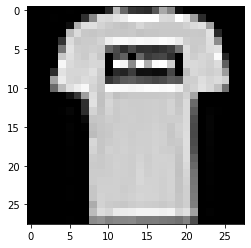

In [22]:
print(X_train[0].shape)
print(X_train.shape)
print(y_train.shape)
plt.figure()
plt.imshow(X_train[0])
plt.imshow(X_train[1], cmap='gray') # 1채널인데 cmap입힌 개념으로 보면 됨

In [23]:
# 2-1. preprocessing : flatten
L, W, H = X_train.shape
X_train = X_train.reshape(-1,W*H)
X_test = X_test.reshape(-1,W*H)

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [24]:
# 2-2. preprocessing : scaling
X_train = X_train/255
X_test = X_test/255

X_train[0][100:105]

array([0.28627451, 0.        , 0.        , 0.00392157, 0.01568627])

In [25]:
# 2-3. preprocessing : one-hot-encoding
Y_train=np_utils.to_categorical(y_train)
Y_test=np_utils.to_categorical(y_test)

Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [32]:
# 3. Model Generation
model = models.Sequential()

In [63]:
model.add(layers.Dense(100, activation='relu', input_shape=(W*H,)))
model.add(layers.Dropout(0.5)) # 50% 끊기
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dropout(0.25)) # 25% 감소
model.add(layers.Dense(10, activation='softmax'))

In [64]:
# 4. loss, optimizer
model.compile('adam','categorical_crossentropy',metrics=['accuracy'])

In [65]:
# 5.학습
model.fit(X_train, Y_train, epochs=20,batch_size=100)

Epoch 1/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.5586 - accuracy: 0.8778
Epoch 2/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.2792 - accuracy: 0.9256
Epoch 3/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.2521 - accuracy: 0.9298
Epoch 4/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.2330 - accuracy: 0.9328
Epoch 5/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.2253 - accuracy: 0.9331
Epoch 6/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.2222 - accuracy: 0.9321
Epoch 7/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.2038 - accuracy: 0.9367
Epoch 8/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.2089 - accuracy: 0.9354
Epoch 9/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.1991 - accuracy: 0.9361
Epoch 10/20
60000/60000 [==============================

In [66]:
# 6. 평가
model_eval = model.evaluate(X_test,Y_test, batch_size=100)
print('Loss : {}, Accuracy : {}' .format(*model_eval))

# prunnung 전 : 0.345, 0.8870
# prunnung 후 : 0.437, 0.8450

10000/10000 [==============================] - 0s 20us/step
Loss : 0.43726120367646215, Accuracy : 0.8845999836921692


In [67]:
# 9. 시각화
# fit 트레이닝할 때 로그 메세지들을 다 모아서 리턴 == history
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.legend(['training', 'validation'])

def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model acc')
    plt.legend(['training', 'validation'])





In [68]:
history = model.fit(X_train,Y_train, epochs=10, batch_size = 100, validation_split= 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 42us/step - loss: 0.1520 - accuracy: 0.9481 - val_loss: 0.2433 - val_accuracy: 0.9212
Epoch 2/10
48000/48000 [==============================] - 2s 44us/step - loss: 0.1549 - accuracy: 0.9465 - val_loss: 0.1780 - val_accuracy: 0.9380
Epoch 3/10
48000/48000 [==============================] - 2s 41us/step - loss: 0.1525 - accuracy: 0.9484 - val_loss: 0.1796 - val_accuracy: 0.9385
Epoch 4/10
48000/48000 [==============================] - 2s 41us/step - loss: 0.1434 - accuracy: 0.9513 - val_loss: 0.1789 - val_accuracy: 0.9403
Epoch 5/10
48000/48000 [==============================] - 2s 45us/step - loss: 0.1440 - accuracy: 0.9498 - val_loss: 0.1838 - val_accuracy: 0.9415
Epoch 6/10
48000/48000 [==============================] - 2s 41us/step - loss: 0.1473 - accuracy: 0.9498 - val_loss: 0.1858 - val_accuracy: 0.9379
Epoch 7/10
48000/48000 [==============================] - 2s 44us/st

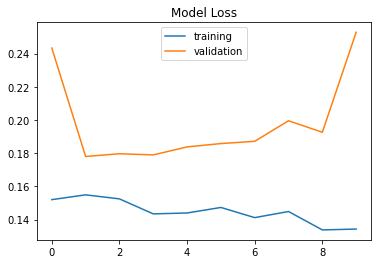

In [69]:
plot_loss(history)

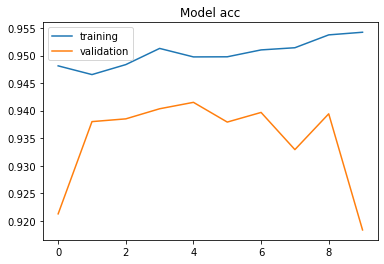

In [70]:
plot_acc(history)

### Image Data Plotting

(60000, 784)


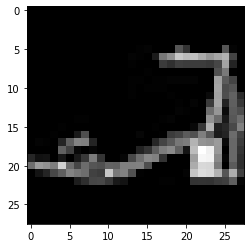

In [52]:
plt.figure()
plt.imshow(X_train[60000-200].reshape(W,H), cmap='gray')

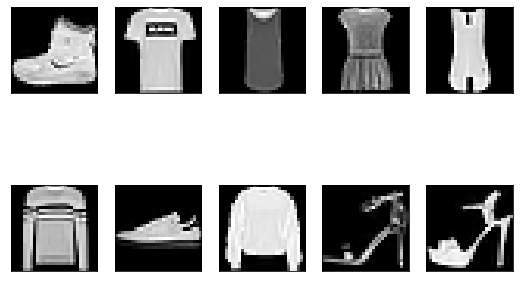

In [62]:
row = 2
col = 5

grid = range(10)
fig, axs=plt.subplots(nrows = row, ncols = col, figsize=(9,6), subplot_kw = {'xticks':[ ],'yticks':[ ]})

# axs # 이미지 확인을 위한 객체

for ax, index in zip(axs.flat, grid):
    ax.imshow(X_train[index].reshape(28,28), cmap='gray')
    
plt.show()
